In [1]:
import pymde

import numpy as np
import matplotlib.pyplot as plt
import torch

/data/jx4237data/python_envs/sprout-env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# load the cooccurrence matrix from compressed npz file
# cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix.npz')['arr_0']
# cooccurrence_matrix.shape

cooccurrence_matrix = np.load('/data/jx4237data/projects/web_page/sprout-main/work/data/cooccurrence_matrix_wextra.npy')

In [3]:
cooccurrence_matrix[0]

array([0.0000000e+00, 3.2317998e+05, 1.8981156e+05, ..., 4.4550000e+01,
       0.0000000e+00, 2.1450000e+01])

In [4]:
import scipy.sparse as sp

# Build sparse matrix from the dense cooccurrence matrix, dropping the zero entries
cooccurrence_matrix_sparse = sp.csr_matrix(cooccurrence_matrix)
cooccurrence_graph = pymde.preprocess.Graph(cooccurrence_matrix_sparse)

In [5]:
dissimilarities = 1. / torch.log(cooccurrence_graph.weights + 1)

dissimilarity_graph = pymde.Graph.from_edges(cooccurrence_graph.edges, dissimilarities)
(dissimilarities.min(), dissimilarities.max())

(tensor(0.0511), tensor(4.4814))

In [6]:
shortest_path_graph = pymde.preprocess.graph.shortest_paths(dissimilarity_graph, verbose=True, n_workers=28)

Aug 21 10:10:59 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=None) ...
Aug 21 10:11:01 AM: Graph is weighted ... using slow path.
Aug 21 10:11:41 AM: processed node 1/9432
Aug 21 10:12:16 AM: processed node 944/9432
Aug 21 10:12:46 AM: processed node 1887/9432
Aug 21 10:13:17 AM: processed node 2830/9432
Aug 21 10:13:47 AM: processed node 3773/9432
Aug 21 10:14:17 AM: processed node 4716/9432
Aug 21 10:14:48 AM: processed node 5659/9432
Aug 21 10:15:18 AM: processed node 6602/9432
Aug 21 10:15:48 AM: processed node 7545/9432
Aug 21 10:16:19 AM: processed node 8488/9432
Aug 21 10:16:49 AM: processed node 9431/9432


In [7]:
n_neighbors = 40
embedding_dim = 4

mde = pymde.preserve_neighbors(shortest_path_graph, embedding_dim=embedding_dim, verbose=True, max_distance=10000, n_neighbors=n_neighbors)

Aug 21 10:16:52 AM: Computing 40-nearest neighbors, with max_distance=10000
Aug 21 10:16:53 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=10000) ...
Aug 21 10:16:53 AM: Graph is weighted ... using slow path.
Aug 21 10:17:37 AM: processed node 1/9432
Aug 21 10:18:05 AM: processed node 944/9432
Aug 21 10:18:33 AM: processed node 1887/9432
Aug 21 10:19:01 AM: processed node 2830/9432
Aug 21 10:19:29 AM: processed node 3773/9432
Aug 21 10:19:58 AM: processed node 4716/9432
Aug 21 10:20:26 AM: processed node 5659/9432
Aug 21 10:20:54 AM: processed node 6602/9432
Aug 21 10:21:22 AM: processed node 7545/9432
Aug 21 10:21:50 AM: processed node 8488/9432
Aug 21 10:22:17 AM: processed node 9431/9432
Aug 21 10:22:22 AM: Computing quadratic initialization.


In [8]:
X = mde.embed(verbose=True,)

Aug 21 10:22:33 AM: Fitting a centered embedding into R^4, for a graph with 9432 items and 721734 edges.
Aug 21 10:22:33 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Aug 21 10:22:33 AM: iteration 000 | distortion 1.306204 | residual norm 0.300803 | step length 0.0358435 | percent change 0.00555087
Aug 21 10:22:37 AM: iteration 030 | distortion 0.428872 | residual norm 0.00145891 | step length 1 | percent change 0.73833
Aug 21 10:22:40 AM: iteration 060 | distortion 0.413540 | residual norm 0.00109752 | step length 1 | percent change 0.941915
Aug 21 10:22:42 AM: iteration 090 | distortion 0.405504 | residual norm 0.000843548 | step length 1 | percent change 0.53233
Aug 21 10:22:45 AM: iteration 120 | distortion 0.399433 | residual norm 0.000496421 | step length 1 | percent change 0.452263
Aug 21 10:22:48 AM: iteration 150 | distortion 0.396647 | residual norm 0.000383079 | step length 1 | percent change 0.19658
Aug 21 10:22:50 AM: iteration 180 | distortion 0

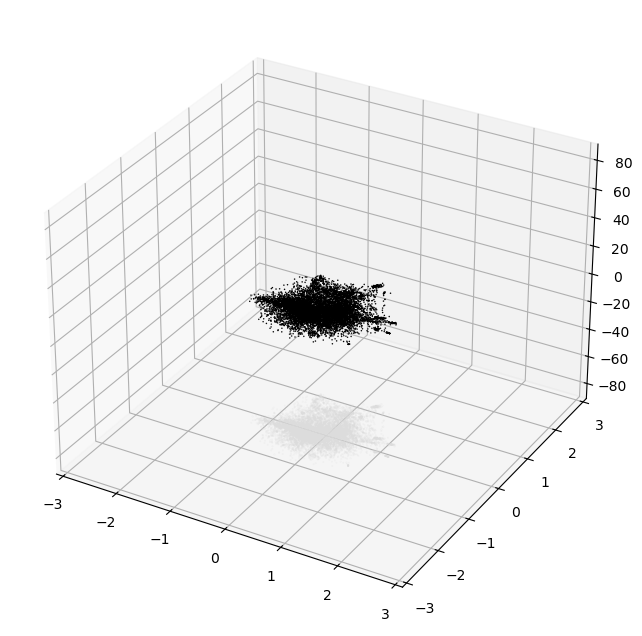

In [9]:
mde.plot(colors=['black'])
# plot from x=-3 to 3
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [10]:
# export in w2v format
fname = f'/data/jx4237data/projects/web_page/sprout-main/work/data/pymde_{embedding_dim}d_{n_neighbors}n.w2v'
with open(fname, 'wt') as f:
    # write header
    f.write('{} {}\n'.format(len(X), mde.embedding_dim))
    for i in range(len(X)):
        row = X[i].tolist()
        f.write('{} {}\n'.format(i, ' '.join(map(str, row))))
fname

'/data/jx4237data/projects/web_page/sprout-main/work/data/pymde_4d_40n.w2v'